## Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.

Explore the students data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find  . 	Description
inter_dom	Types of students (international or domestic)
japanese_cate	Japanese language proficiency
english_cate	English language proficiency
academic	Current academic level (undergraduate or graduate)
age	Current age of student
stay	Current length of stay in years
todep	Total score of depression (PHQ-9 test)
tosc	Total score of social connectedness (SCS test)
toas	Total score of acculturative stress (ASISS test)

## Py Soln.

Average Scores by Student Type:
               stay     todep       tosc       toas
inter_dom                                          
Dom        2.402985  8.611940  37.641791  62.835821
Inter      2.064677  8.044776  37.417910  75.562189


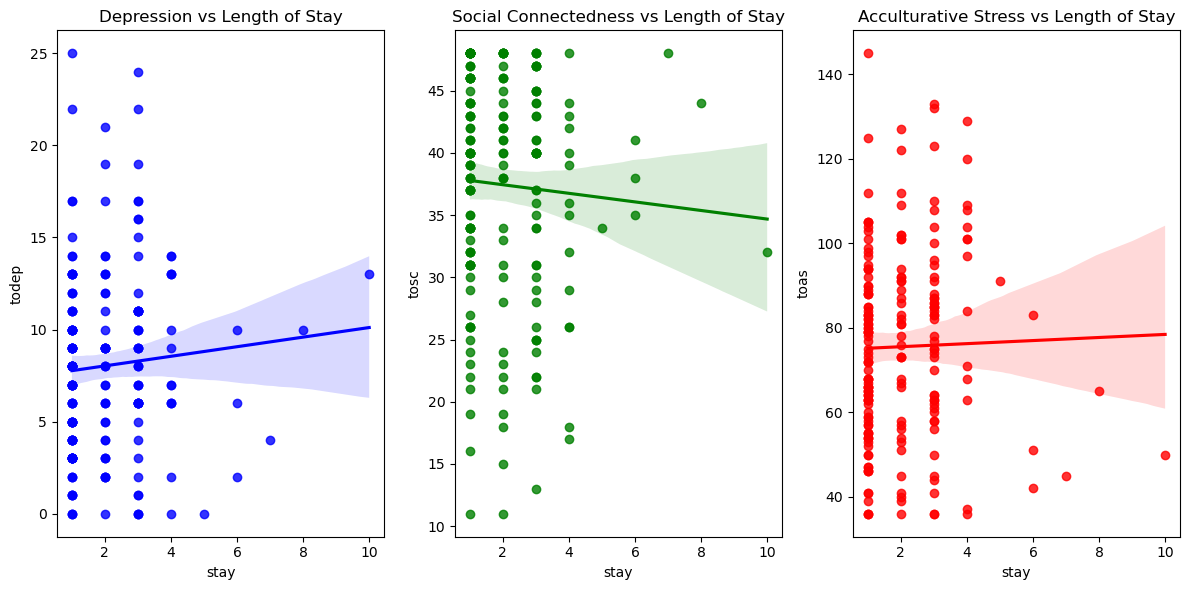

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
file_path = '/Users/divyeshbhatt/Downloads/Datas/SQL/students.csv'  # Replace with your file path
students_df = pd.read_csv(file_path)

# Focus on relevant columns
relevant_columns = ['inter_dom', 'stay', 'todep', 'tosc', 'toas']
mental_health_df = students_df[relevant_columns]

# Grouping the data by student type (international or domestic)
grouped_data = mental_health_df.groupby('inter_dom').mean()
print("Average Scores by Student Type:")
print(grouped_data)

# Filter the dataset for international students only
international_students = mental_health_df[mental_health_df['inter_dom'] == 'Inter']

# Plotting correlations between length of stay and mental health indicators
plt.figure(figsize=(12, 6))

# Depression score vs Length of stay
plt.subplot(1, 3, 1)
sns.regplot(x='stay', y='todep', data=international_students, color='blue')
plt.title('Depression vs Length of Stay')

# Social connectedness score vs Length of stay
plt.subplot(1, 3, 2)
sns.regplot(x='stay', y='tosc', data=international_students, color='green')
plt.title('Social Connectedness vs Length of Stay')

# Acculturative stress score vs Length of stay
plt.subplot(1, 3, 3)
sns.regplot(x='stay', y='toas', data=international_students, color='red')
plt.title('Acculturative Stress vs Length of Stay')

plt.tight_layout()
plt.show()


## SQL

In [2]:
import sys
!{sys.executable} -m pip install ipython-sql

In [3]:
%load_ext sql

In [4]:
%sql sqlite:///my_database.db

In [15]:
import pandas as pd
import sqlite3

# Load your CSV file
students = pd.read_csv('/Users/divyeshbhatt/Downloads/Datas/SQL/students.csv')

In [18]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect(":memory:")

# Write the data to a sqlite table
df.to_sql('students', con, index=False, if_exists='replace')

286

In [19]:
query = """
SELECT stay, 
       COUNT(*) AS count_int,
       ROUND(AVG(todep), 2) AS average_phq, 
       ROUND(AVG(tosc), 2) AS average_scs, 
       ROUND(AVG(toas), 2) AS average_as
FROM students
WHERE inter_dom = 'Inter'
GROUP BY stay
ORDER BY stay DESC;
"""

In [20]:
res = pd.read_sql_query(query, con)
res

,stay,count_int,average_phq,average_scs,average_as
0,10.0,1,13.00,32.00,50.00
1,8.0,1,10.00,44.00,65.00
2,7.0,1,4.00,48.00,45.00
3,6.0,3,6.00,38.00,58.67
4,5.0,1,0.00,34.00,91.00
5,4.0,14,8.57,33.93,87.71
6,3.0,46,9.09,37.13,78.00
7,2.0,39,8.28,37.08,77.67
8,1.0,95,7.48,38.11,72.80


In [21]:
con.close()